##Basic Exploratory Data Analysis (EDA)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
#Load the train and test datasets into dataframes
train_df = pd.read_csv('../../dataset/train.csv')

In [25]:
#Display training data to gain insights
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


**We can see that our data contains of 21 feature as follows:**


*    id - ID
*    battery_power - Total energy a battery can store in one time measured in mAh
*    blue - Has Bluetooth or not
*    clock_speed - The speed at which the microprocessor executes instructions

*    dual_sim - Has dual sim support or not
*    fc - Front Camera megapixels
*    four_g - Has 4G or not
*    int_memory - Internal Memory in Gigabytes
*    m_dep - Mobile Depth in cm
*    mobile_wt - Weight of mobile phone
*    n_cores - Number of cores of the processor
*    pc - Primary Camera megapixels
*    px_height - Pixel Resolution Height
*    px_width - Pixel Resolution Width
*    ram - Random Access Memory in Megabytes
*    sc_h - Screen Height of mobile in cm
*    sc_w - Screen Width of mobile in cm
*    talk_time - longest time that a single battery charge will last when you are
*    three_g - Has 3G or not
*    touch_screen - Has touch screen or not
*    wifi - Has wifi or not
*   price_range - This is the target variable with the value of: 0 (low cost) - 1 (medium cost) - 2 (high cost) - 3 (very high cost)


  




In [26]:
#Checking null values in our dataset
train_df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,5
four_g,5
int_memory,5
m_dep,5
mobile_wt,4
n_cores,4


In [27]:
#Getting some information about the data types and number of data points we have
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [28]:
#Getting some stastical insights about our data
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [29]:
train_df.nunique()

,0
battery_power,1094
blue,2
clock_speed,26
dual_sim,2
fc,20
four_g,2
int_memory,63
m_dep,10
mobile_wt,121
n_cores,8


In [43]:
# Value counts for each class in the 'price_range' column
price_range_counts = train_df['price_range'].value_counts()
print(price_range_counts)

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


**Notable insights based on the analysis so far:**



*   Target variable (price_range) is evenly distributed among the 4 classes
*   Some of the columns have missing values that we need to deal with during the feature engineering phase :

  * fc	------ 5
  *  four_g		------ 5
  *   int_memory		------ 5
  *  m_dep	------ 5
  * mobile_wt		------ 4
  * n_cores		------ 4
  * pc		------ 5
  * px_height		------ 4
  * px_width		------ 2
  * ram		------ 2
  * sc_h		------ 1
  * sc_w		------ 1



*   We have some binary categorical variables *(Wifi, dual_sim, blue, four_g)*














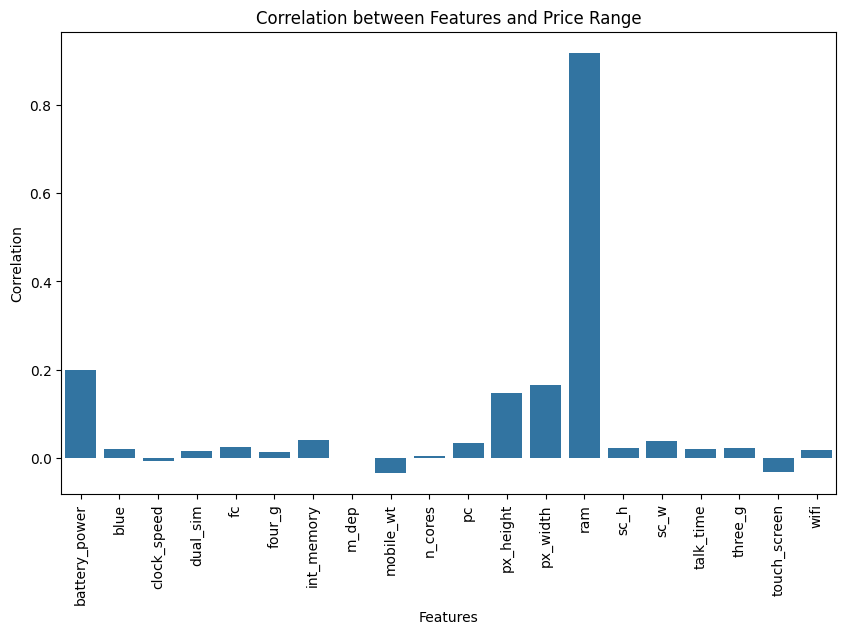

In [30]:
#Visualizing the correlation between each variable and the target variable (price range) using bar plot

#Create a correlation matrix
corr_matrix = train_df.corr()

#Filter the correlation matrix to include only the correlations with 'price_range'
corr_with_price = corr_matrix['price_range'].drop('price_range')

#Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_price.index, y=corr_with_price.values)
plt.xticks(rotation=90)
plt.title('Correlation between Features and Price Range')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

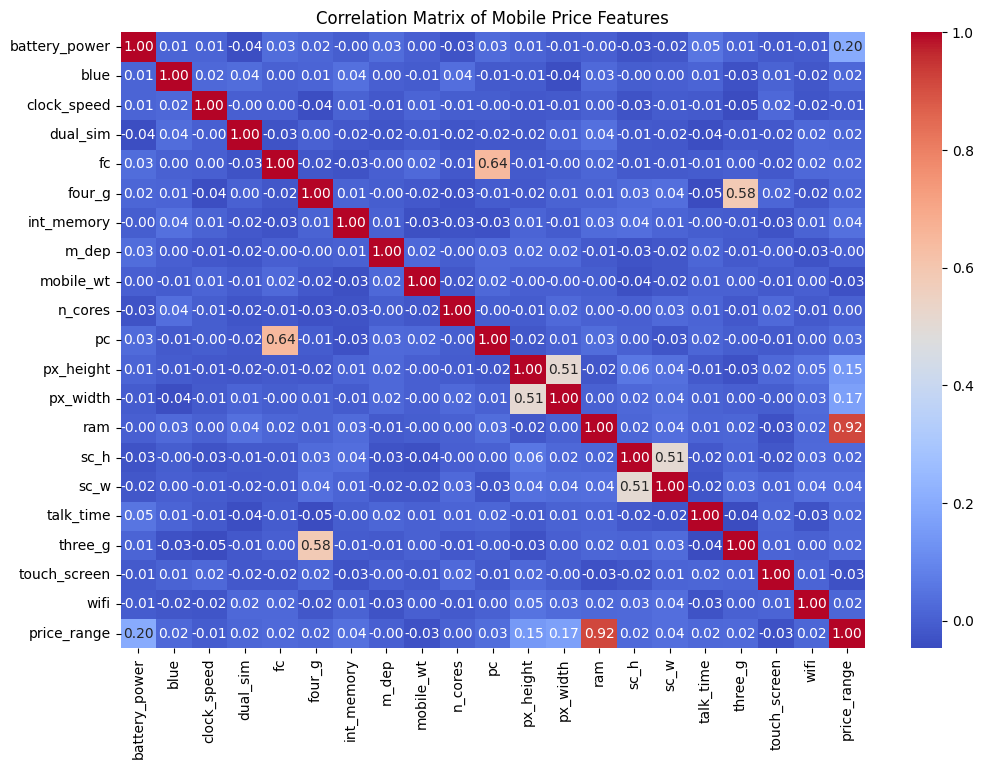

In [31]:
# Visualizing the correlation between each variable and the target variable (price range) using correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Mobile Price Features')
plt.show()



* We can clearly see from the bar plot and the correlation matrix that RAM (Random Access Memory) has the highest correlation **(0.92)** with price which means whenever the ram increases the device price also increases   
*   Battery power has the second highest correlation with Price Range **(0.20)**


*   We can also notice high correlation between fc (Front Camera pixels) and pc (Primary Camera pixels) **0.64**
*   High correlation between px_height (Pixel Height) and px_width (Pixel Width) **0.51**

*   High correlation between three_g and four_g **0.58**





##Box Plots for some features and Price Range

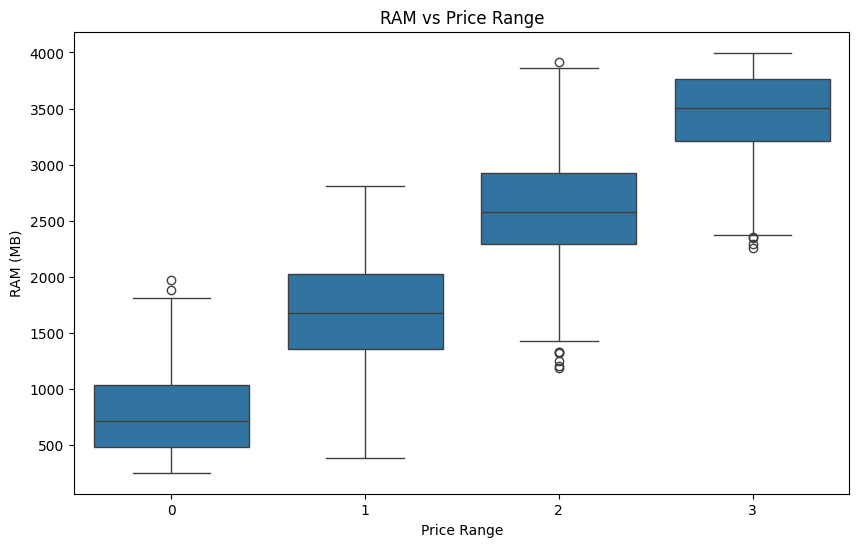

In [37]:
#Visualizing the correlation between Ram and Price Range using box plot
plt.figure(figsize=(10,6))
sns.boxplot(x="price_range", y="ram", data=train_df)
plt.title('RAM vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM (MB)')
plt.show()

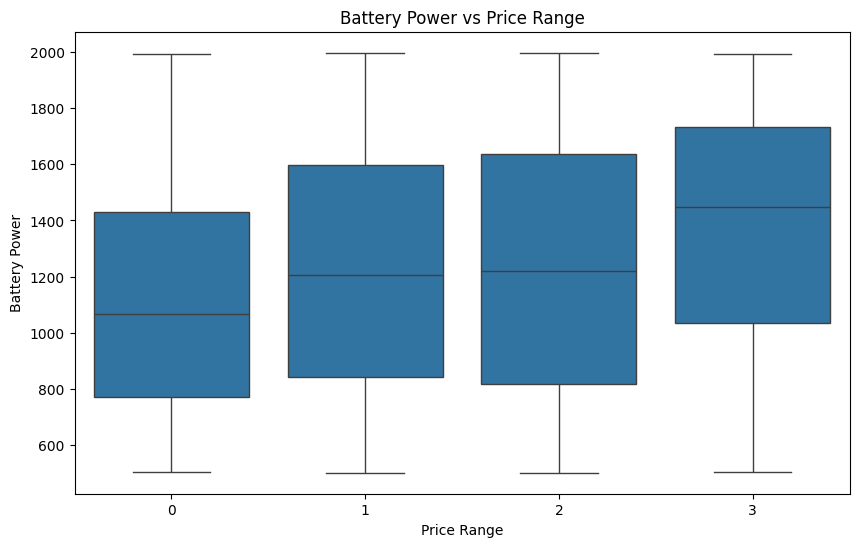

In [42]:
#Visualizing the correlation between Battery Power and Price Range using box plot
plt.figure(figsize=(10,6))
sns.boxplot(x="price_range", y="battery_power", data=train_df)
plt.title('Battery Power vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()

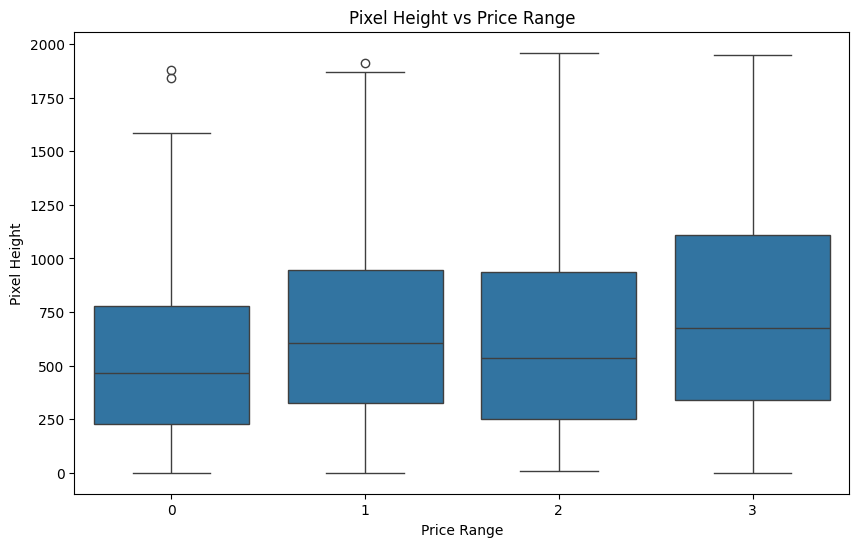

In [39]:
#Visualizing the correlation between Pixel Height and Price Range using box plot
plt.figure(figsize=(10,6))
sns.boxplot(x="price_range", y="px_height", data=train_df)
plt.title('Pixel Height vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Pixel Height')
plt.show()

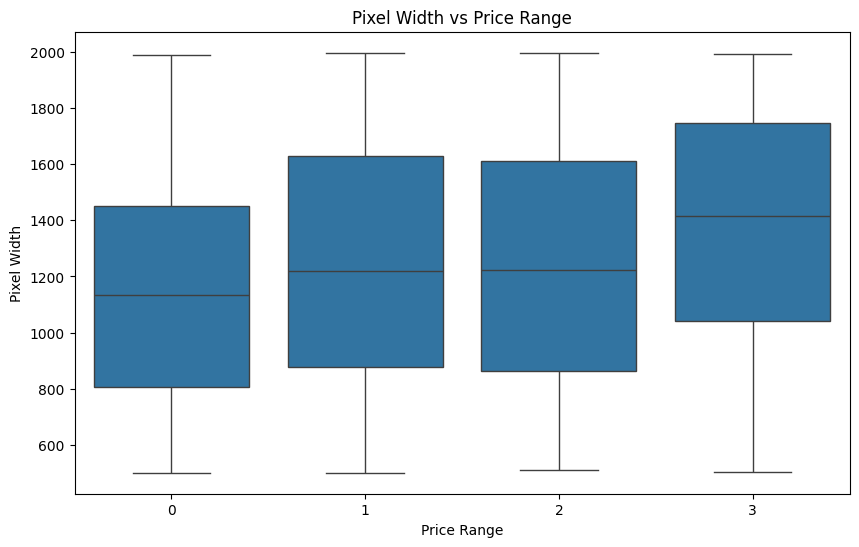

In [40]:
#Visualizing the correlation between Pixel Width and Price Range using box plot
plt.figure(figsize=(10,6))
sns.boxplot(x="price_range", y="px_width", data=train_df)
plt.title('Pixel Width vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Pixel Width')
plt.show()

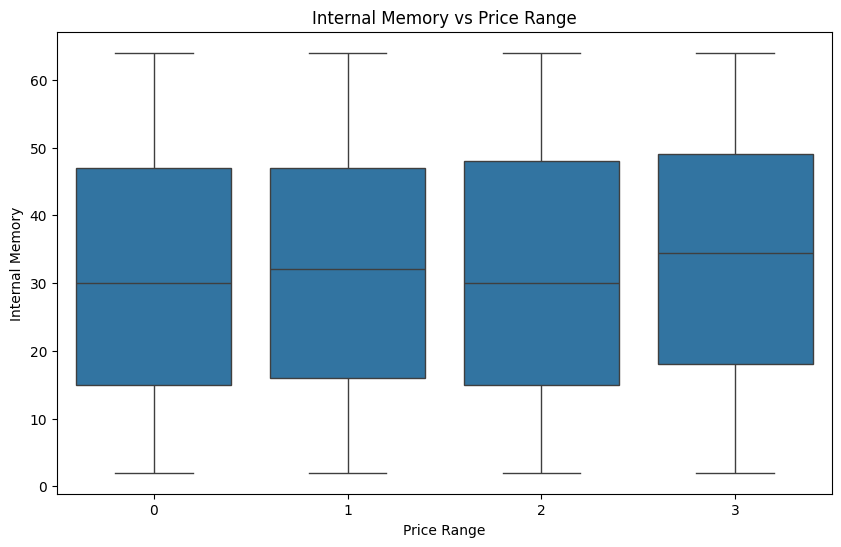

In [41]:
#Visualizing the correlation between Internal Memory and Price Range using box plot
plt.figure(figsize=(10,6))
sns.boxplot(x="price_range", y="int_memory", data=train_df)
plt.title('Internal Memory vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Internal Memory')
plt.show()

##Distribution for some features

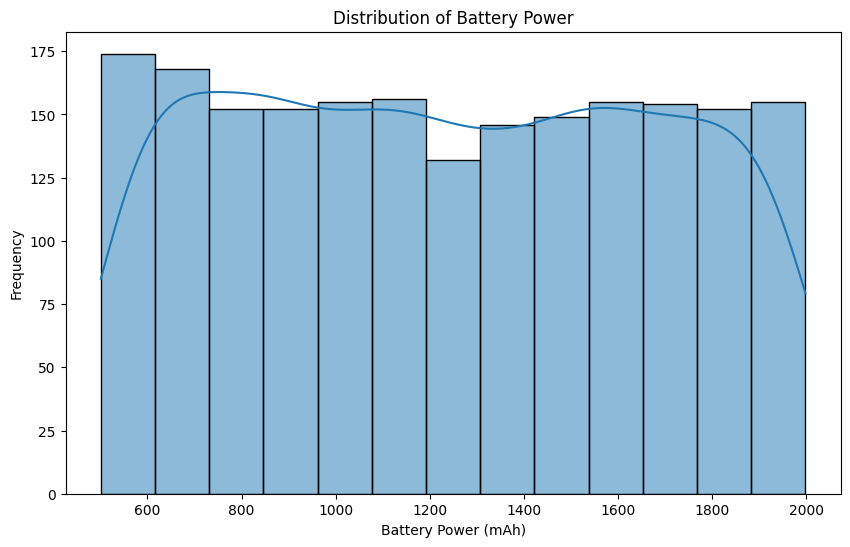

In [18]:
#Distribution for Battery Power
plt.figure(figsize=(10, 6))
sns.histplot(train_df['battery_power'], kde=True)
plt.title('Distribution of Battery Power')
plt.xlabel('Battery Power (mAh)')
plt.ylabel('Frequency')
plt.show()


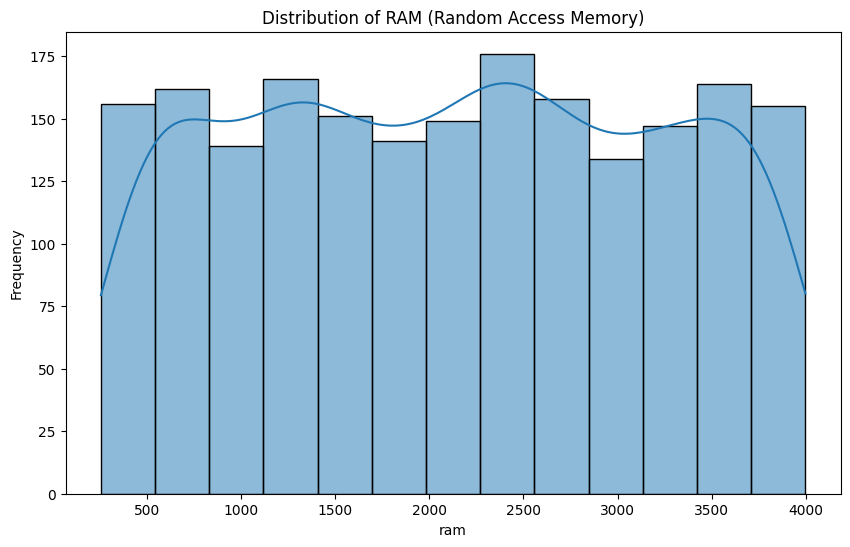

In [19]:
#Distribution for Ram
plt.figure(figsize=(10, 6))
sns.histplot(train_df['ram'], kde=True)
plt.title('Distribution of RAM (Random Access Memory)')
plt.xlabel('ram')
plt.ylabel('Frequency')
plt.show()


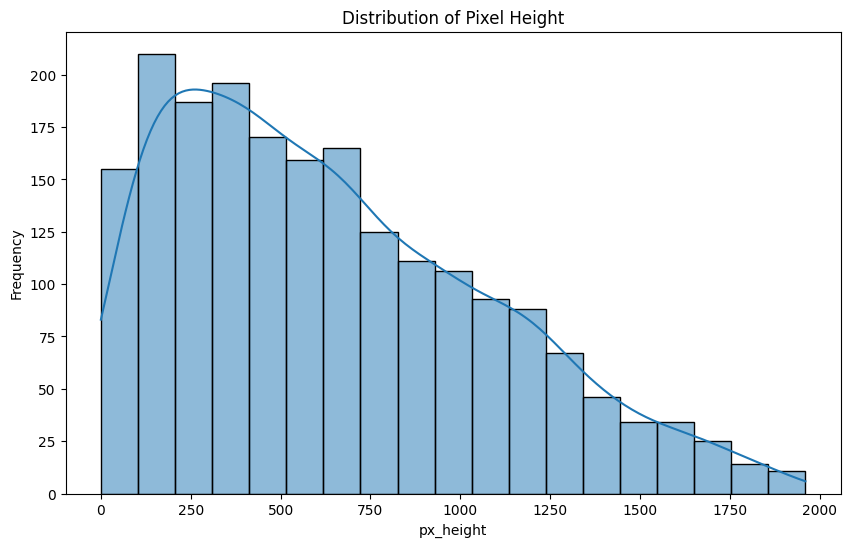

In [20]:
#Distribution for Pixel Height
plt.figure(figsize=(10, 6))
sns.histplot(train_df['px_height'], kde=True)
plt.title('Distribution of Pixel Height')
plt.xlabel('px_height')
plt.ylabel('Frequency')
plt.show()

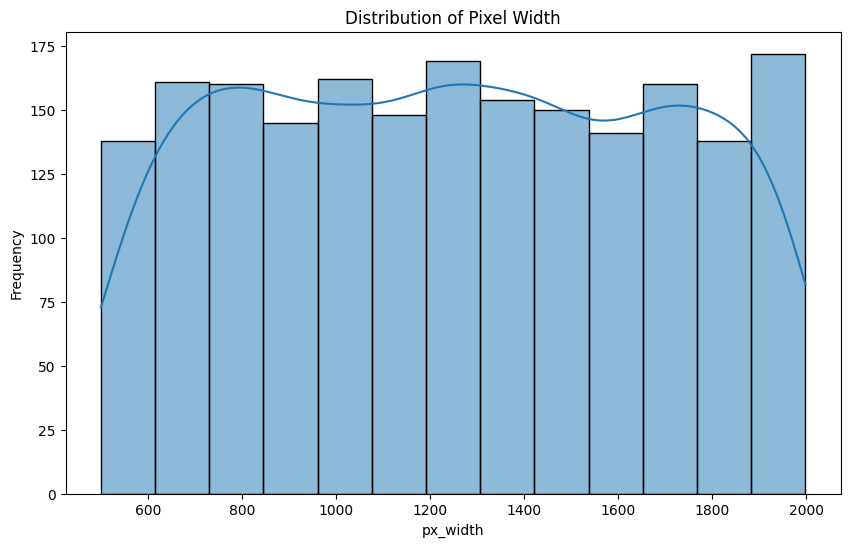

In [21]:
#Distribution for Pixel Width
plt.figure(figsize=(10, 6))
sns.histplot(train_df['px_width'], kde=True)
plt.title('Distribution of Pixel Width')
plt.xlabel('px_width')
plt.ylabel('Frequency')
plt.show()

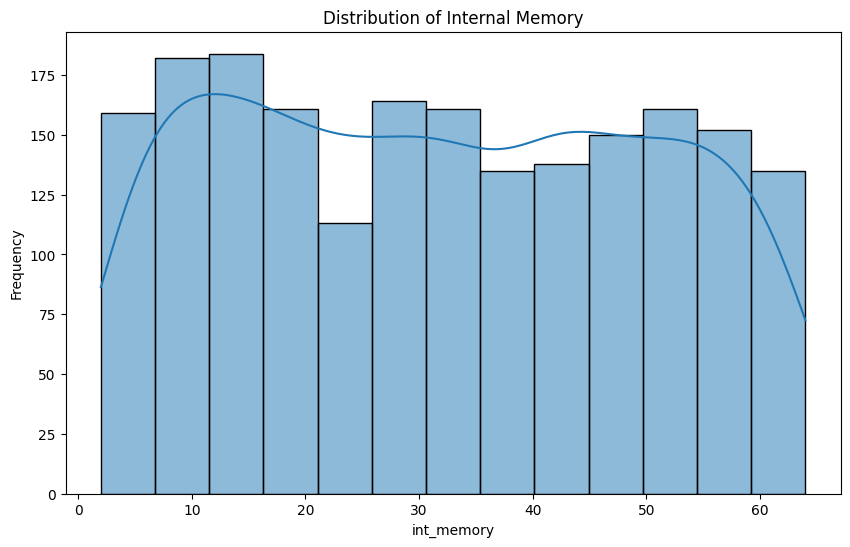

In [22]:
#Distribution for Internal Memory
plt.figure(figsize=(10, 6))
sns.histplot(train_df['int_memory'], kde=True)
plt.title('Distribution of Internal Memory')
plt.xlabel('int_memory')
plt.ylabel('Frequency')
plt.show()

##Final Insights:##
1. Target variable is evenly distributed which is better for training without any bias towards a specific class

2. RAM is the most significant feature in correlation with the target variable

3. features such as Battery Power, Pixel Height and Pixel Width also shows a strong positive correlation with target variable

4. It's logical to find such high positive correlations, as devices with higher RAM and battery power often come with a higher price tag

5. Battery power and RAM are distributed in a nearly normal pattern, with minimal variations from the expected distribution while some other features like pixel height shows a significant skewness